##1. Data Collection & Loading

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data (1).csv to data (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##2. Exploratory Data Analysis (EDA)

In [3]:
#Reading Dataset
df = pd.read_csv('data (1).csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(df.shape)
print(len(df))
print(len(df.columns))

(569, 33)
569
33


# Columns/Variables in the dataset

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### The above dataset has 33 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### The column 32(Unnamed:32) has all NULL values and can be removed

In [7]:
df.rename({"Unnamed: 32":"a"}, axis="columns", inplace=True)
df.drop(["a"], axis=1, inplace=True)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### Target variable diagnosis is a categorial variable M: Malignant, B: Benign. It is changed to M:1, B:0

In [8]:
print(len(df.columns))

32


## Number of benign and malignant observations

Number of Benign patients 357
Number of Malignant patients 212


<Axes: xlabel='count', ylabel='diagnosis'>

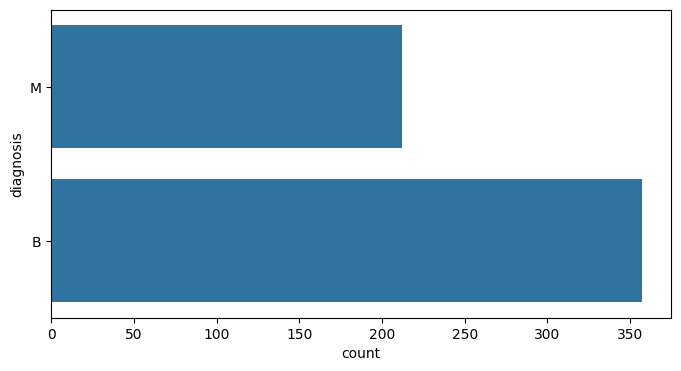

In [9]:
# Number of Benign and Malignant observations
benign,malignant = df['diagnosis'].value_counts()
print("Number of Benign patients", benign)
print("Number of Malignant patients", malignant)

plt.figure(figsize = (8,4))
sns.countplot(df['diagnosis'])

##3. Data Preprocessing

### Target and Feature variables

In [10]:
y = df['diagnosis'].values # Target variable
X = df.drop('diagnosis', axis =1).values # Feature variables

##4. Splitting the Dataset

### Spliting data into train and test sets

In [11]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 31)
(114, 31)
(455,)
(114,)


##5. Model Training

### Data Normalization

In [12]:
# Normalization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

##6. Model Evaluation:

## Logistic Regression

In [13]:
#Model building
model = LogisticRegression(max_iter=1000)

#Tuning parameters
parameters = {'C':[0.001,0.01, 0.1, 0.2,0.3, 1,10,100,200]}
grid_search = GridSearchCV(model, parameters, cv = 10) # 10 Fold Cross Validation

# Model fitting
grid_search.fit(X_train_sc, y_train)


print("Best Score is ", grid_search.best_score_)
print("Best Estimator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)

Best Score is  0.9758454106280194
Best Estimator is  LogisticRegression(C=1, max_iter=1000)
Best Parametes are {'C': 1}


In [14]:
#After hyperparameter tuning
model = LogisticRegression(C = 0.3)
model.fit(X_train_sc, y_train)
y_pred_lr = model.predict(X_test_sc)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy on Test Data:",accuracy_lr)

Accuracy on Test Data: 0.9824561403508771


Classification report

In [15]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        66
           M       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##7. Building a Predictive System:

Confusion matrix

In [16]:
confusion_matrix(y_test,y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,66,0
Malignant,2,46
